In [130]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
J = os.path.join

root = J(os.environ["DATASET_ROOT"], "bcd2022", "alen")

In [2]:
files = [
J(root, "190315990"),
J(root, "1351270472"),
]

pngs = [f+".png" for f in files]
dcms = [f+".dcm" for f in files]

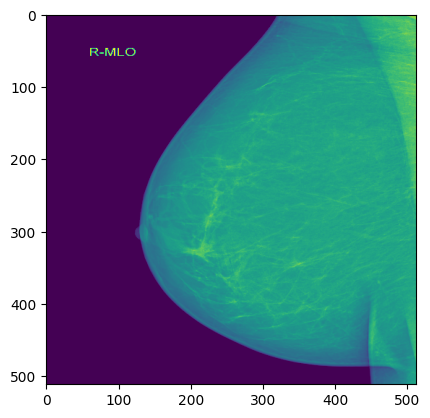

In [3]:
imgs = [Image.open(file) for file in pngs]
plt.imshow(imgs[0])

# Read DICOM

In [34]:
from pydicom.pixel_data_handlers import apply_windowing
import numpy as np

In [154]:
def get_pixels(dcm_file):
    im = pydicom.dcmread(dcm_file)
    data = im.pixel_array
    
    if im.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    else:
        data = data - np.min(data)
        
    if np.max(data) != 0:
        data = data / np.max(data)
    data=(data * 255).astype(np.uint8)

    return data


def get_pixels_window(path: str):
    ds = dset = dicomsdl.open(path)
    
    print(ds.getPixelDataInfo())
    data = ds.pixelData()
    print("Pixel min and max", data.min(), data.max())
    
    w = ds.WindowWidth
    c = ds.WindowCenter
    

    y_min = c - w/2
    y_max = c + w/2
    
    print("y_min, y_max:", y_min, y_max)
    
    (c - (data/w)/2)
    
    data = ((data - (c - 0.5)) / (w-1) + 0.5) * 255
    
    data[data < 0] = 0
    data[data > 255] = 255
    
    if ds.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    
    print("Win center:", c)
    print("Win width:", w)
    print("data min max:", data.min(), data.max())
    

    return data



{'Rows': 2776, 'Cols': 2082, 'NumberOfFrames': 1, 'SamplesPerPixel': 1, 'PlanarConfiguration': None, 'BitsAllocated': 16, 'BytesAllocated': 2, 'BitsStored': 12, 'PixelRepresentation': False, 'dtype': 'H', 'PhotometricInterpretation': 'MONOCHROME2', 'WindowCenter': 1706.0, 'WindowWidth': 1500.0, 'RescaleIntercept': 0.0, 'RescaleSlope': 1.0}
Pixel min and max 0.0 2624.0
y_min, y_max: 956.0 2456.0
Win center: 1706.0
Win width: 1500.0
data min max: 0.0 255.0
0 255
0.0 255.0


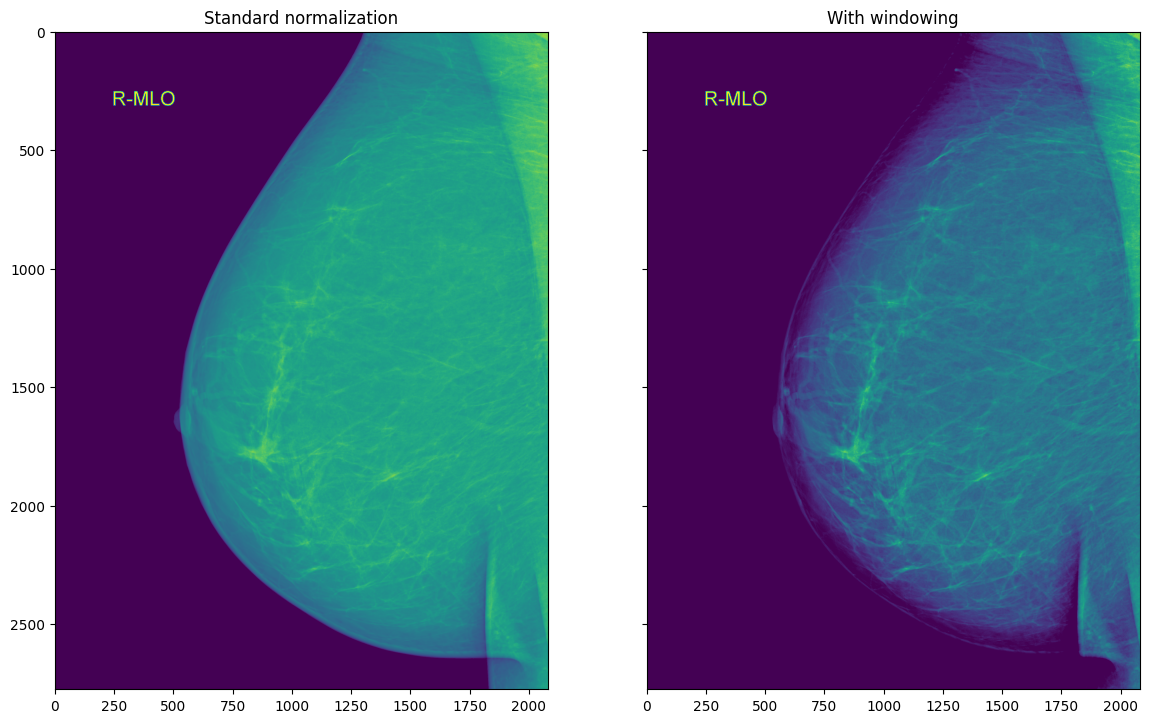

In [155]:
file = dcms[0]
pixels = get_pixels(file)
pixels_with_windowing = get_pixels_window(file)
print(pixels.min(), pixels.max())
print(pixels_with_windowing.min(), pixels_with_windowing.max())
# Plot the images
fig, axes = plt.subplots(nrows=1, ncols=2,sharex=False, sharey=True, figsize=(14, 10))
ax = axes.ravel()
ax[0].set_title(f'Standard normalization')
ax[0].imshow(pixels, vmin=0, vmax=255);
ax[1].set_title(f'With windowing')
ax[1].imshow(pixels_with_windowing, vmin=0, vmax=255);

In [82]:
pixels_with_windowing

array([[  0,   0,   0, ..., 137, 132, 134],
       [  0,   0,   0, ..., 137, 135, 135],
       [  0,   0,   0, ..., 134, 138, 134],
       ...,
       [  0,   0,   0, ...,  94,  93,  92],
       [  0,   0,   0, ...,  95,  94,  94],
       [  0,   0,   0, ...,  94,  95,  91]], dtype=uint8)

In [83]:
pixels

array([[  0,   0,   0, ..., 213, 205, 208],
       [  0,   0,   0, ..., 213, 209, 209],
       [  0,   0,   0, ..., 208, 214, 208],
       ...,
       [  0,   0,   0, ..., 146, 144, 143],
       [  0,   0,   0, ..., 147, 146, 146],
       [  0,   0,   0, ..., 146, 147, 141]], dtype=uint8)